## Import Libraries
Let's import some libraries to get started!

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# The Data

Reading in the titanic.csv file into a pandas dataframe.

In [37]:
#READING TEST DATA

df=pd.read_csv("titanic.csv")

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

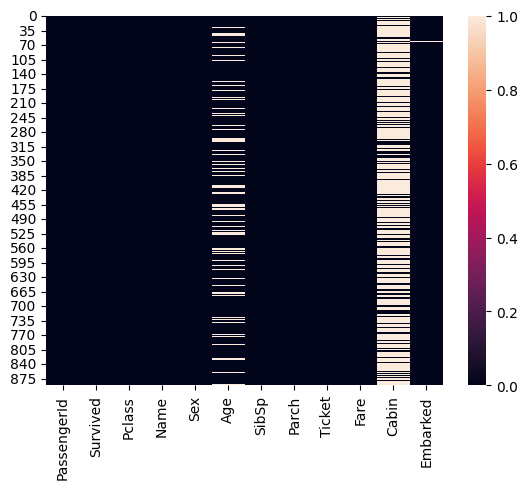

In [39]:
sns.heatmap(df.isnull())

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful .

<Axes: xlabel='Survived', ylabel='count'>

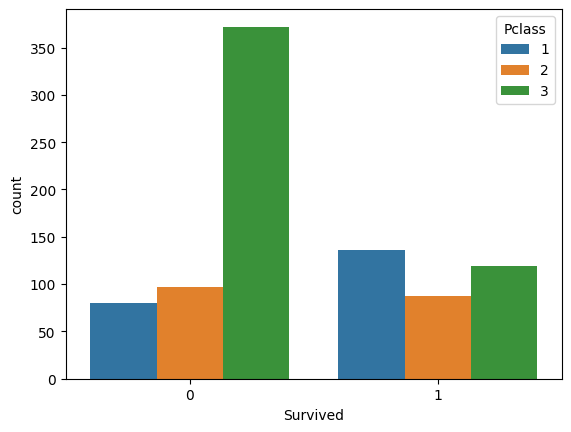

In [40]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<Axes: xlabel='Survived', ylabel='count'>

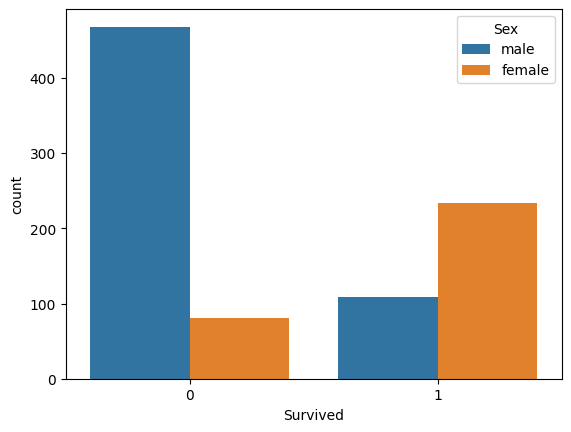

In [41]:
sns.countplot(x='Survived',hue='Sex',data=df)

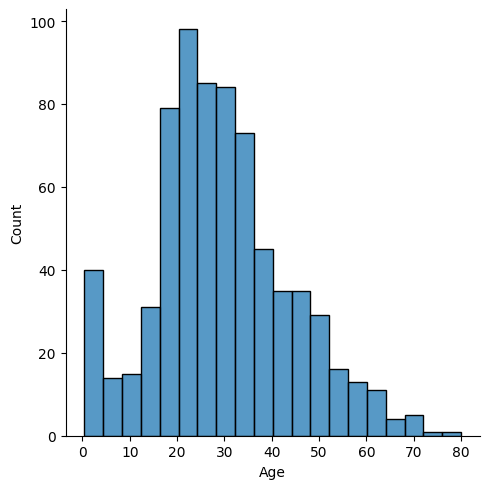

In [42]:
sns.displot(x=df["Age"].dropna())

<Axes: xlabel='SibSp', ylabel='count'>

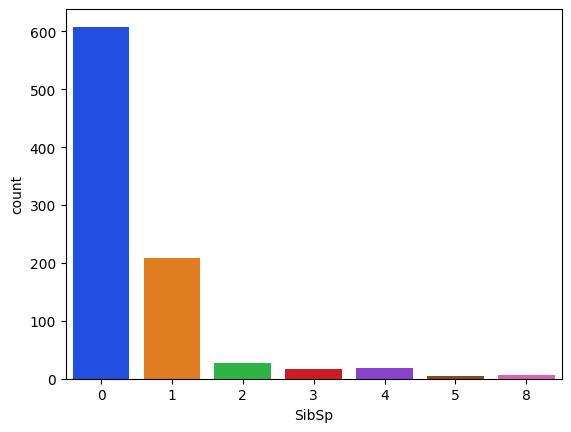

In [43]:
sns.countplot(x="SibSp",data=df,palette="bright")

<Axes: xlabel='Fare', ylabel='Count'>

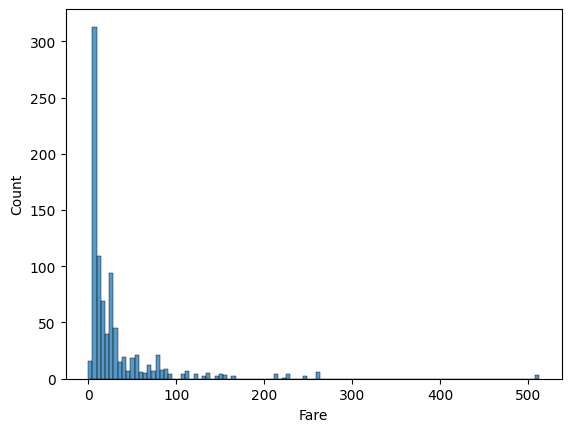

In [44]:
sns.histplot(x=df['Fare'])

#___
## Data Cleaning
Filling missing age data instead of just dropping the missing age data rows .By filling in the average age by passenger class.
 

<Axes: xlabel='Pclass', ylabel='Age'>

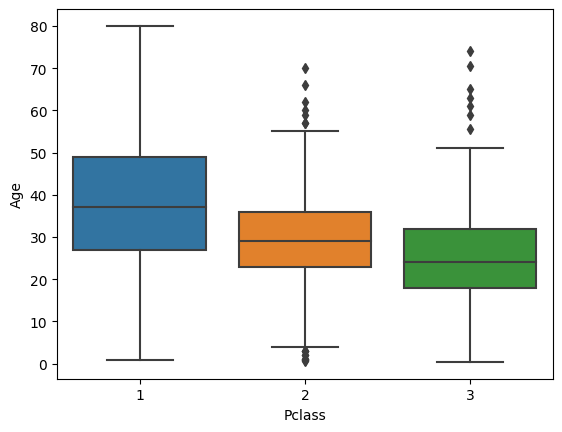

In [45]:
sns.boxplot(x='Pclass',y='Age',data=df)

Here we can see the average age of Pclass 1 = 37 , PCLASS 2 = 29 ,PCLASS 3 = 24 .
So we can fill the missing value using the class wise average of the age.

In [46]:
def calculate_age(col):
    age = col[0]
    pclass =col[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass ==2:
            return 29
        else:
            return 24
    else:
        return age

In [47]:
df["Age"] = df[['Age',"Pclass"]].apply(calculate_age,axis=1)

<Axes: >

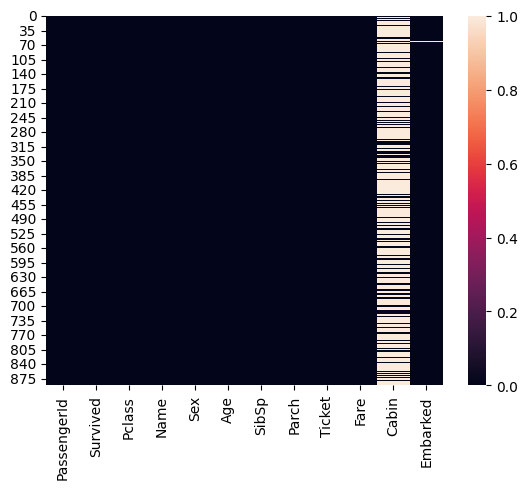

In [48]:
sns.heatmap(df.isnull())

In [49]:
df.drop('Cabin',axis=1,inplace=True)

#Here we are droping the Cabin because its not possible to fill missing values and it can lead to error in output in further process

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

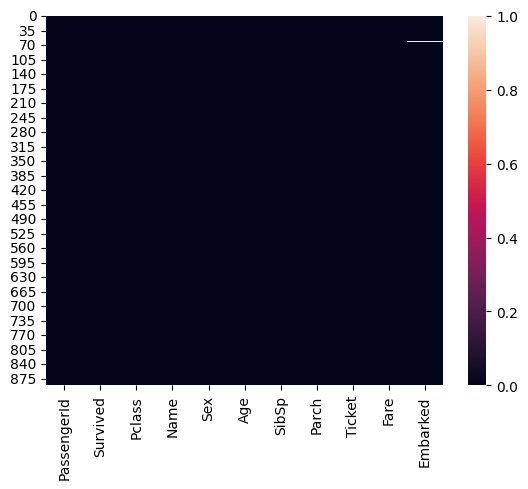

In [51]:
sns.heatmap(df.isnull())

In [52]:
df.dropna(inplace=True)

<Axes: >

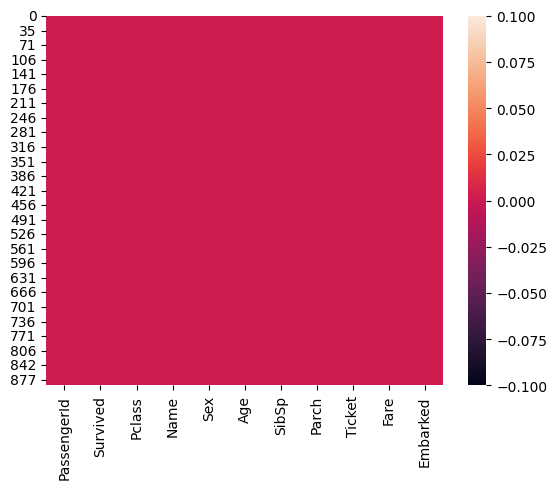

In [53]:
sns.heatmap(df.isnull())

In [54]:
sex = pd.get_dummies(df['Sex'],drop_first=True).astype(int)
embark = pd.get_dummies(df['Embarked'],drop_first=True).astype(int)

In [55]:
df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [56]:
df = pd.concat([df,sex,embark],axis=1)

In [57]:
df.head()
#NOW OUR DATA IS READY FOR MODEL.

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression model
Splitting our data into a training set and test set.
## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'], test_size=0.30,random_state=101)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [62]:
predictions = logmodel.predict(X_test)

## Evaluation

We can check precision,recall,f1-score using classification report!

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [65]:
from sklearn.metrics import accuracy_score

In [66]:
#Accuracy of the model.
accuracy = accuracy_score(y_test,predictions)

In [67]:
print("Prediction Accuracy:", accuracy)

Prediction Accuracy: 0.8314606741573034
